# <div style="text-align: center">The Data Scientist’s Toolbox Tutorial - 2</div>

### <div style="text-align: center">Quite Practical and Far from any Theoretical Concepts</div>
<img src='https://chengotto.com/wp-content/uploads/2018/02/images.duckduckgo2-600x338.jpg'>
<div style="text-align:center">last update: <b>12/02/2018</b></div>


>###### you may  be interested have a look at it: [**The Data Scientist’s Toolbox Tutorial - 1**](https://www.kaggle.com/mjbahmani/the-data-scientist-s-toolbox-tutorial-1)


---------------------------------------------------------------------
you can Fork and Run this kernel on Github:
> ###### [ GitHub](https://github.com/mjbahmani/10-steps-to-become-a-data-scientist)

-------------------------------------------------------------------------------------------------------------

 **I hope you find this kernel helpful and some <font color="red"><b>UPVOTES</b></font> would be very much appreciated**
 
 -----------

 <a id="top"></a> <br>
## Notebook  Content
1. [Introduction](#1)
    1. [Import](#2)
    1. [Version](#3)
1. [Sklearn](#4)
    1. [Data Collection](#5)
    1. [Framework](#6)
    1. [Applications](#7)
    1. [How to use Sklearn Data Set? ](#8)
    1. [Loading external data](#9)
    1. [Model Deployment](#10)
    1. [Families of ML algorithms](#11)
    1. [Prepare Features & Targets](#12)
    1. [Accuracy and precision](#13)
    1. [Estimators](#14)
    1. [Predictors](#15)
    1. [K-Nearest Neighbours](#16)
    1. [Radius Neighbors Classifier](#17)
    1. [Logistic Regression](#18)
    1. [Passive Aggressive Classifier](#19)
    1. [Naive Bayes](#20)
    1. [BernoulliNB](#21)
    1. [SVM](#22)
    1. [Nu-Support Vector Classification](#23)
    1. [Linear Support Vector Classification](#24)
    1. [Decision Tree](#25)
    1. [ExtraTreeClassifier](#26)
    1. [Neural network](#27)
        1. [What is a Perceptron?](#28)
        1. [The XOR Problem](#29)
    1. [RandomForest](#30)
    1. [Bagging classifier ](#31)
    1. [AdaBoost classifier](#32)
    1. [Gradient Boosting Classifier](#33)
    1. [Linear Discriminant Analysis](#34)
    1. [Quadratic Discriminant Analysis](#35)
    1. [Kmeans](#36)
        1. [Plot classification probability](#37)
1. [conclusion](#47)
1. [References](#48)

<a id="1"></a> <br>
# 1-Introduction
This Kernel is mostly for **beginners**, and of course, all **professionals** who think they need to review  their  knowledge.
Also, this is  the second version for (  [The Data Scientist’s Toolbox Tutorial - 1](https://www.kaggle.com/mjbahmani/the-data-scientist-s-toolbox-tutorial-1) ) and we will continue with other important packages in this kernel.keep following!

<a id="2"></a> <br>
##   1-1 Import

In [90]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas import get_dummies
from sklearn import datasets
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os

<a id="3"></a> <br>
## 1-2 Version

In [91]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

matplotlib: 2.2.3
sklearn: 0.20.1
scipy: 1.1.0
seaborn: 0.9.0
pandas: 0.23.4
numpy: 1.15.4
Python: 3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
[GCC 7.3.0]


## 1-3 Setup

A few tiny adjustments for better **code readability**

In [92]:
sns.set(style='white', context='notebook', palette='deep')
warnings.filterwarnings('ignore')
sns.set_style('white')
%matplotlib inline
matplotlib.style.use('ggplot')

<a id="4"></a> <br>
# 2- Sklearn 
- The __open source__ Python ecosystem provides __a standalone, versatile and powerful scientific working environment__, including: [NumPy](http://numpy.org), [SciPy](http://scipy.org), [IPython](http://ipython.org), [Matplotlib](http://matplotlib.org), [Pandas](http://pandas.pydata.org/), _and many others..._



- Scikit-Learn builds upon NumPy and SciPy and __complements__ this scientific environment with machine learning algorithms;
- By design, Scikit-Learn is __non-intrusive__, easy to use and easy to combine with other libraries;
- Core algorithms are implemented in low-level languages.

## 2-1 Algorithms

**Supervised learning**:

1. Linear models (Ridge, Lasso, Elastic Net, ...)
1. Support Vector Machines
1. Tree-based methods (Random Forests, Bagging, GBRT, ...)
1. Nearest neighbors 
1. Neural networks (basics)
1. Gaussian Processes
1. Feature selection

**Unsupervised learning**:

1. Clustering (KMeans, Ward, ...)
1. Matrix decomposition (PCA, ICA, ...)
1. Density estimation
1. Outlier detection

__Model selection and evaluation:__

1. Cross-validation
1. Grid-search
1. Lots of metrics

_... and many more!_ (See our [Reference](http://scikit-learn.org/dev/modules/classes.html))
<a id="5"></a> <br>
## 2-2 Data Collection
**Data collection** is the process of gathering and measuring data, information or any variables of interest in a standardized and established manner that enables the collector to answer or test hypothesis and evaluate outcomes of the particular collection.[techopedia]

**Iris dataset**  consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.[6]
###### [Go to top](#top)

In [93]:
# import Dataset to play with it
iris = pd.read_csv('../input/iris-dataset/Iris.csv')
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

**<< Note 1 >>**

* Each row is an observation (also known as : sample, example, instance, record)
* Each column is a feature (also known as: Predictor, attribute, Independent Variable, input, regressor, Covariate)

After loading the data via **pandas**, we should checkout what the content is, description and via the following:

In [94]:
type(iris)

pandas.core.frame.DataFrame

<a id="6"></a> <br>
# 2-3 Framework

Data comes as a finite learning set ${\cal L} = (X, y)$ where
* Input samples are given as an array $X$ of shape `n_samples` $\times$ `n_features`, taking their values in ${\cal X}$;
* Output values are given as an array $y$, taking _symbolic_ values in ${\cal Y}$.
###### [Go to top](#top)

The goal of supervised classification is to build an estimator $\varphi: {\cal X} \mapsto {\cal Y}$ minimizing

$$
Err(\varphi) = \mathbb{E}_{X,Y}\{ \ell(Y, \varphi(X)) \}
$$

where $\ell$ is a loss function, e.g., the zero-one loss for classification $\ell_{01}(Y,\hat{Y}) = 1(Y \neq \hat{Y})$.

<a id="7"></a> <br>
# 2-4 Applications

1. **Classifying** signal from background events; 
1. **Diagnosing** disease from symptoms;
1. **Recognising** cats in pictures;
1. **Identifying** body parts with Kinect cameras;
- ...
  ###### [Go to top](#top)

<a id="8"></a> <br>
# 2-5 How to use Sklearn Data Set? 

- Input data = Numpy arrays or Scipy sparse matrices ;
- Algorithms are expressed using high-level operations defined on matrices or vectors (similar to MATLAB) ;
    - Leverage efficient low-leverage implementations ;
    - Keep code short and readable. 

In [95]:
# Generate data
from sklearn.datasets import make_blobs
import numpy as np
X, y = make_blobs(n_samples=1000, centers=20, random_state=123)
labels = ["b", "r"]
y = np.take(labels, (y < 10))
print(X) 
print(y[:5])

[[-6.45255647 -8.76358259]
 [ 0.28982141  0.14677196]
 [-5.18412293 -1.25347025]
 ...
 [-0.23142814 -1.60800704]
 [-0.60291835  6.87297279]
 [ 2.28425964  4.87408773]]
['r' 'r' 'b' 'r' 'b']


In [96]:
# X is a 2 dimensional array, with 1000 rows and 2 columns
print(X.shape)
 
# y is a vector of 1000 elements
print(y.shape)

(1000, 2)
(1000,)


In [97]:
# Rows and columns can be accessed with lists, slices or masks
print(X[[1, 2, 3]])     # rows 1, 2 and 3
print(X[:5])            # 5 first rows
print(X[500:510, 0])    # values from row 500 to row 510 at column 0
print(X[y == "b"][:5])  # 5 first rows for which y is "b"

[[ 0.28982141  0.14677196]
 [-5.18412293 -1.25347025]
 [-4.71388847  3.67440463]]
[[-6.45255647 -8.76358259]
 [ 0.28982141  0.14677196]
 [-5.18412293 -1.25347025]
 [-4.71388847  3.67440463]
 [ 4.51558296 -2.88138033]]
[-4.43836309 -2.45974437  4.33104832 -7.92069399  1.56972029  0.56451501
  4.99608298  4.75811106 -1.60421418  1.10129122]
[[-5.18412293 -1.25347025]
 [ 4.51558296 -2.88138033]
 [ 1.70826922  2.62387342]
 [-0.52606562  8.95985097]
 [-1.07591403  9.78730967]]


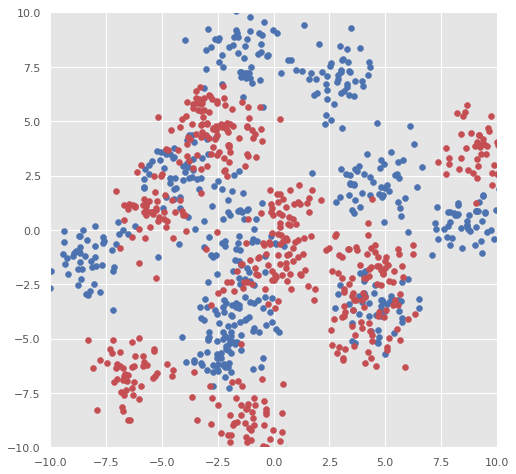

In [98]:
# Plot
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.max_open_warning"] = -1
plt.figure()
for label in labels:
    mask = (y == label)
    plt.scatter(X[mask, 0], X[mask, 1], c=label)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [99]:
from sklearn.datasets import load_wine
data = load_wine()
data.target[[10, 80, 140]]
list(data.target_names)


['class_0', 'class_1', 'class_2']

<a id="9"></a> <br>
# 2-6 Loading external data

1. Numpy provides some [simple tools](https://docs.scipy.org/doc/numpy/reference/routines.io.html) for loading data from files (CSV, binary, etc);

1. For structured data, Pandas provides more [advanced tools](http://pandas.pydata.org/pandas-docs/stable/io.html) (CSV, JSON, Excel, HDF5, SQL, etc);
###### [Go to top](#top)

## 2-7 what is new?
A new clustering algorithm: cluster.**OPTICS**: an algoritm related to cluster.**DBSCAN**, that has hyperparameters easier to set and that scales better


In [100]:
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array([[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80]])
clustering = DBSCAN(eps=3, min_samples=2).fit(X)


In [101]:
clustering.labels_

array([ 0,  0,  0,  1,  1, -1])

In [102]:
clustering 

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=None, p=None)

## 2-8 Tip & Trick
In this section we gather some useful advice and tools that may increase your quality-of-life when reviewing pull requests, running unit tests, and so forth. Some of these tricks consist of userscripts that require a browser extension such as TamperMonkey or GreaseMonkey; to set up userscripts you must have one of these extensions installed, enabled and running. We provide userscripts as GitHub gists; to install them, click on the “Raw” button on the gist page.

### 2-8-1 Profiling Python code

In [103]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_digits
X = load_digits().data
%timeit NMF(n_components=16, tol=1e-2).fit(X)

372 ms ± 9.49 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<a id="10"></a> <br>
# 2-9 Model Deployment
All learning algorithms in scikit-learn share a uniform and limited API consisting of complementary interfaces:

1. an `estimator` interface for building and fitting models;
1. a `predictor` interface for making predictions;
1. a `transformer` interface for converting data.

Goal: enforce a simple and consistent API to __make it trivial to swap or plug algorithms__. 

In this section have been applied more than **20 learning algorithms** that play an important rule in your experiences and improve your knowledge in case of using sklearn.

> **<< Note 3 >>** : The results shown here may be slightly different for your analysis because, for example, the neural network algorithms use random number generators for fixing the initial value of the weights (starting points) of the neural networks, which often result in obtaining slightly different (local minima) solutions each time you run the analysis. Also note that changing the seed for the random number generator used to create the train, test, and validation samples can change your results.

  ###### [Go to top](#top)

<a id="11"></a> <br>
## 2-10  Families of ML algorithms
There are several categories for machine learning algorithms, below are some of these categories:
<img src='https://i.stack.imgur.com/rLN4Z.png'>
* Linear
    * Linear Regression
    * Logistic Regression
    * Support Vector Machines
* Tree-Based
    * Decision Tree
    * Random Forest
    * GBDT
* KNN
* Neural Networks

-----------------------------
And if we  want to categorize ML algorithms with the type of learning, there are below type:
* Classification

    * k-Nearest 	Neighbors
    * LinearRegression
    * SVM
    * DT 
    * NN
    
* clustering

    * K-means
    * HCA
    * Expectation Maximization
    
* Visualization 	and	dimensionality 	reduction:

    * Principal 	Component 	Analysis(PCA)
    * Kernel PCA
    * Locally -Linear	Embedding 	(LLE)
    * t-distributed	Stochastic	Neighbor	Embedding 	(t-SNE)
    
* Association 	rule	learning

    * Apriori
    * Eclat
* Semisupervised learning
* Reinforcement Learning
    * Q-learning
* Batch learning & Online learning
* Ensemble  Learning

**<< Note >>**
> Here is no method which outperforms all others for all tasks

###### [Go to top](#top)

<a id="12"></a> <br>
## 2-11 Prepare Features & Targets
First of all seperating the data into dependent(**Feature**) and independent(**Target**) variables.

**<< Note 4 >>**
1. X==>>Feature
1. y==>>Target
##  Test error

Issue: the training error is a __biased__ estimate of the generalization error.

Solution: Divide ${\cal L}$ into two disjoint parts called training and test sets (usually using 70% for training and 30% for test).
1. Use the training set for fitting the model;
1. Use the test set for evaluation only, thereby yielding an unbiased estimate.

  ###### [Go to top](#top)

In [104]:

X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<a id="13"></a> <br>
## 2-12 Accuracy and precision
- Recall that we want to learn an estimator $\varphi$ minimizing the generalization error $Err(\varphi) = \mathbb{E}_{X,Y}\{ \ell(Y, \varphi(X)) \}$.

- Problem: Since $P_{X,Y}$ is unknown, the generalization error $Err(\varphi)$ cannot be evaluated.

- Solution: Use a proxy to approximate $Err(\varphi)$.
* **precision** : 

In pattern recognition, information retrieval and binary classification, precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, 
* **recall** : 

recall is the fraction of relevant instances that have been retrieved over the total amount of relevant instances. 
* **F-score** :

the F1 score is a measure of a test's accuracy. It considers both the precision p and the recall r of the test to compute the score: p is the number of correct positive results divided by the number of all positive results returned by the classifier, and r is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive). The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.
**What is the difference between accuracy and precision?**
"Accuracy" and "precision" are general terms throughout science. A good way to internalize the difference are the common "bullseye diagrams". In machine learning/statistics as a whole, accuracy vs. precision is analogous to bias vs. variance.
###### [Go to top](#top)

<a id="14"></a> <br>
## 2-13 Estimators

In [105]:
class Estimator(object):
    def fit(self, X, y=None):
        """Fits estimator to data."""
        # set state of ``self``
        return self

In [106]:
# Import the nearest neighbor class
from sklearn.neighbors import KNeighborsClassifier  # Change this to try 
                                                    # something else

# Set hyper-parameters, for controlling algorithm
clf = KNeighborsClassifier(n_neighbors=5)

# Learn a model from training data
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [107]:
# Estimator state is stored in instance attributes
clf._tree

<a id="15"></a> <br>
## 2-14 Predictors

In [108]:
# Make predictions  
print(clf.predict(X[:5])) 

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [109]:
# Compute (approximate) class probabilities
print(clf.predict_proba(X[:5]))

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


## 3-Feature Scaling with scikit-learn
Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step[wikipedia].

In this section  we explore 3 methods of feature scaling that are implemented in scikit-learn:
1. StandardScaler
1. MinMaxScaler
1. RobustScaler
1. Normalizer

## 3-1 Standard Scaler
The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.

The mean and standard deviation are calculated for the feature and then the feature is scaled based on:

$xi–$mean(x)/ $stdev(x)
If data is not normally distributed, this is not the best scaler to use.

Let’s take a look at it in action:

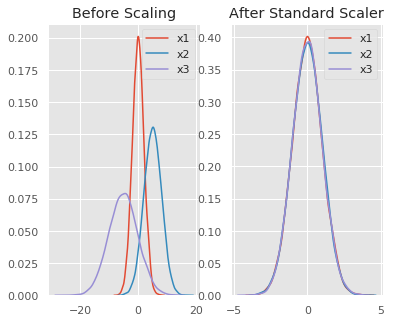

In [110]:
np.random.seed(1)
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

All features are now on the same scale relative to one another.

## 3-2 Min-Max Scaler

The **MinMaxScaler** is the probably the most famous scaling algorithm, and follows the following formula for each feature:

xi – min(x) / max(x) – min(x)

It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).

This scaler works better for cases in which the standard scaler might not work so well. If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.

However, it is sensitive to outliers, so if there are outliers in the data, you might want to consider the **Robust Scaler** below.

For now, let’s see the min-max scaler in action

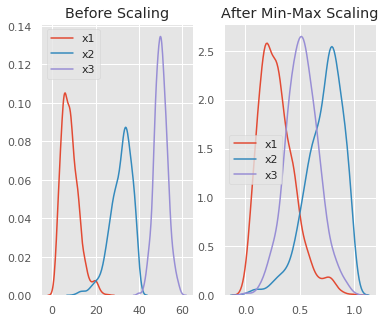

In [111]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

Notice that the skewness of the distribution is maintained but the 3 distributions are brought into the same scale so that they overlap.

## 3-3 Robust Scaler
The RobustScaler uses a similar method to the Min-Max scaler but it instead uses the interquartile range, rathar than the min-max, so that it is robust to outliers. Therefore it follows the formula:

xi–Q1(x) / Q3(x)–Q1(x)
For each feature.

Of course this means it is using the less of the data for scaling so it’s more suitable for when there are outliers in the data.

Let’s take a look at this one in action on some data with outliers


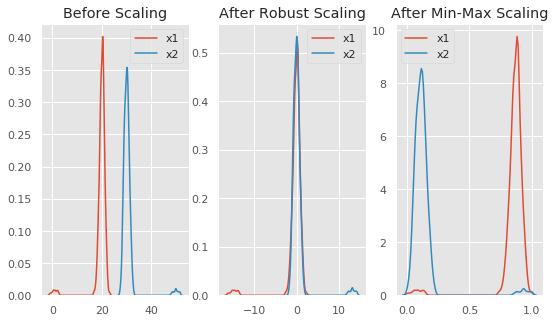

In [112]:
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['x1', 'x2'])

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1)
sns.kdeplot(x['x2'], ax=ax1)
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df['x2'], ax=ax2)
ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df['x2'], ax=ax3)
plt.show()

Notice that after Robust scaling, the distributions are brought into the same scale and overlap, but the outliers remain outside of bulk of the new distributions.

However, in Min-Max scaling, the two normal distributions are kept seperate by the outliers that are inside the 0-1 range.

## 3-4 Normalizer
The normalizer scales each value by dividing each value by its magnitude in n-dimensional space for n number of features.

Each point is now within 1 unit of the origin on this Cartesian co-ordinate system.

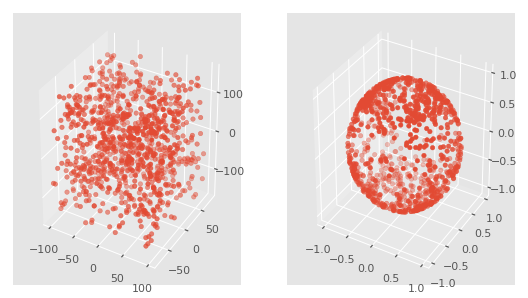

In [113]:
from mpl_toolkits.mplot3d import Axes3D

df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

scaler = preprocessing.Normalizer()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1'])
plt.show()

Note that the points are all brought within a sphere that is at most 1 away from the origin at any point. Also, the axes that were previously different scales are now all one scale.

## 5- Machine Learning Algorithms with scikit-learn
In this section we will examine 20 different algorithms using this scikit-learn.

<a id="16"></a> <br>
## 5-1 K-Nearest Neighbours
In **Machine Learning**, the **k-nearest neighbors algorithm** (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
In k-NN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors.
k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification. The k-NN algorithm is among the simplest of all machine learning algorithms.
###### [Go to top](#top)

In [114]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


<a id="17"></a> <br>
##  5-2 Radius Neighbors Classifier
Classifier implementing a **vote** among neighbors within a given **radius**

In scikit-learn **RadiusNeighborsClassifier** is very similar to **KNeighborsClassifier** with the exception of two parameters. First, in RadiusNeighborsClassifier we need to specify the radius of the fixed area used to determine if an observation is a neighbor using radius. Unless there is some substantive reason for setting radius to some value, it is best to treat it like any other hyperparameter and tune it during model selection. The second useful parameter is outlier_label, which indicates what label to give an observation that has no observations within the radius - which itself can often be a useful tool for identifying outliers.
###### [Go to top](#top)

In [115]:
from sklearn.neighbors import  RadiusNeighborsClassifier
Model=RadiusNeighborsClassifier(radius=8.0)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
#summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#Accouracy score
print('accuracy is ', accuracy_score(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is  1.0


<a id="18"></a> <br>
## 5-3 Logistic Regression
Logistic regression is the appropriate regression analysis to conduct when the dependent variable is **dichotomous** (binary). Like all regression analyses, the logistic regression is a **predictive analysis**.

In statistics, the logistic model (or logit model) is a widely used statistical model that, in its basic form, uses a logistic function to model a binary dependent variable; many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model; it is a form of binomial regression. Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail, win/lose, alive/dead or healthy/sick; these are represented by an indicator variable, where the two values are labeled "0" and "1"
###### [Go to top](#top)

In [116]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.75      1.00      0.86         6

      micro avg       0.93      0.93      0.93        30
      macro avg       0.92      0.95      0.92        30
   weighted avg       0.95      0.93      0.94        30

[[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]
accuracy is 0.9333333333333333


<a id="19"></a> <br>
##   5-4 Passive Aggressive Classifier

In [117]:
from sklearn.linear_model import PassiveAggressiveClassifier
Model = PassiveAggressiveClassifier()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       0.52      1.00      0.69        11
Iris-versicolor       0.00      0.00      0.00        13
 Iris-virginica       0.67      1.00      0.80         6

      micro avg       0.57      0.57      0.57        30
      macro avg       0.40      0.67      0.50        30
   weighted avg       0.33      0.57      0.41        30

[[11  0  0]
 [10  0  3]
 [ 0  0  6]]
accuracy is 0.5666666666666667


<a id="20"></a> <br>
## 5-5 Naive Bayes
In machine learning, naive Bayes classifiers are a family of simple "**probabilistic classifiers**" based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

In [118]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


<a id="21"></a> <br>
##  5-6 BernoulliNB
Like MultinomialNB, this classifier is suitable for **discrete data**. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.

In [119]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
Model = BernoulliNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        11
Iris-versicolor       0.00      0.00      0.00        13
 Iris-virginica       0.20      1.00      0.33         6

      micro avg       0.20      0.20      0.20        30
      macro avg       0.07      0.33      0.11        30
   weighted avg       0.04      0.20      0.07        30

[[ 0  0 11]
 [ 0  0 13]
 [ 0  0  6]]
accuracy is 0.2


<a id="22"></a> <br>
## 5-7 SVM

The advantages of support vector machines are:
* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples. 
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation
###### [Go to top](#top)

In [120]:
# Support Vector Machine
from sklearn.svm import SVC

Model = SVC()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


<a id="23"></a> <br>
## 5-8 Nu-Support Vector Classification

> Similar to SVC but uses a parameter to control the number of support vectors.

In [121]:
# Support Vector Machine's 
from sklearn.svm import NuSVC

Model = NuSVC()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


<a id="24"></a> <br>
## 5-9 Linear Support Vector Classification

Similar to **SVC** with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.
###### [Go to top](#top)

In [122]:
# Linear Support Vector Classification
from sklearn.svm import LinearSVC

Model = LinearSVC()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.76      1.00      0.87        13
 Iris-virginica       1.00      0.33      0.50         6

      micro avg       0.87      0.87      0.87        30
      macro avg       0.92      0.78      0.79        30
   weighted avg       0.90      0.87      0.84        30

[[11  0  0]
 [ 0 13  0]
 [ 0  4  2]]
accuracy is 0.8666666666666667


<a id="25"></a> <br>
## 5-10 Decision Tree
Decision Trees (DTs) are a non-parametric supervised learning method used for **classification** and **regression**. The goal is to create a model that predicts the value of a target variable by learning simple **decision rules** inferred from the data features.
###### [Go to top](#top)

In [123]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier()

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

      micro avg       0.97      0.97      0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy is 0.9666666666666667


<a id="26"></a> <br>
## 5-11 ExtraTreeClassifier
An extremely randomized tree classifier.

Extra-trees differ from classic decision trees in the way they are built. When looking for the best split to separate the samples of a node into two groups, random splits are drawn for each of the **max_features** randomly selected features and the best split among those is chosen. When max_features is set 1, this amounts to building a totally random decision tree.

**Warning**: Extra-trees should only be used within ensemble methods.
###### [Go to top](#top)

In [124]:
# ExtraTreeClassifier
from sklearn.tree import ExtraTreeClassifier

Model = ExtraTreeClassifier()

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


<a id="27"></a> <br>
## 5-12 Neural network

I have used multi-layer Perceptron classifier.
This model optimizes the log-loss function using **LBFGS** or **stochastic gradient descent**.
###### [Go to top](#top)

In [125]:
from sklearn.neural_network import MLPClassifier
Model=MLPClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
# Summary of the predictions
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       0.58      1.00      0.73        11
Iris-versicolor       0.00      0.00      0.00        13
 Iris-virginica       0.55      1.00      0.71         6

      micro avg       0.57      0.57      0.57        30
      macro avg       0.37      0.67      0.48        30
   weighted avg       0.32      0.57      0.41        30

[[11  0  0]
 [ 8  0  5]
 [ 0  0  6]]
accuracy is  0.5666666666666667


<a id="30"></a> <br>
## 5-13  RandomForest
A random forest is a meta estimator that **fits a number of decision tree classifiers** on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).
###### [Go to top](#top)

In [126]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(max_depth=2)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is  1.0


<a id="31"></a> <br>
## 5-14 Bagging classifier 
A Bagging classifier is an ensemble **meta-estimator** that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

This algorithm encompasses several works from the literature. When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as Pasting . If samples are drawn with replacement, then the method is known as Bagging . When random subsets of the dataset are drawn as random subsets of the features, then the method is known as Random Subspaces . Finally, when base estimators are built on subsets of both samples and features, then the method is known as Random Patches .[http://scikit-learn.org]
###### [Go to top](#top)

In [127]:
from sklearn.ensemble import BaggingClassifier
Model=BaggingClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

      micro avg       0.97      0.97      0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  1]
 [ 0  0  5]]
accuracy is  0.9666666666666667


<a id="32"></a> <br>
##  5-15 AdaBoost classifier

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
This class implements the algorithm known as **AdaBoost-SAMME** .

In [128]:
from sklearn.ensemble import AdaBoostClassifier
Model=AdaBoostClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

      micro avg       0.97      0.97      0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  1]
 [ 0  0  5]]
accuracy is  0.9666666666666667


<a id="33"></a> <br>
## 5-16 Gradient Boosting Classifier
GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions.

In [129]:
from sklearn.ensemble import GradientBoostingClassifier
Model=GradientBoostingClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

      micro avg       0.97      0.97      0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  1]
 [ 0  0  5]]
accuracy is  0.9666666666666667


<a id="34"></a> <br>
## 5-17 Linear Discriminant Analysis
Linear Discriminant Analysis (discriminant_analysis.LinearDiscriminantAnalysis) and Quadratic Discriminant Analysis (discriminant_analysis.QuadraticDiscriminantAnalysis) are two classic classifiers, with, as their names suggest, a **linear and a quadratic decision surface**, respectively.

These classifiers are attractive because they have closed-form solutions that can be easily computed, are inherently multiclass, have proven to work well in practice, and have no **hyperparameters** to tune.
###### [Go to top](#top)

In [130]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Model=LinearDiscriminantAnalysis()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is  1.0


<a id="35"></a> <br>
## 5-18 Quadratic Discriminant Analysis
A classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.

The model fits a **Gaussian** density to each class.
###### [Go to top](#top)

In [131]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
Model=QuadraticDiscriminantAnalysis()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is  1.0


<a id="36"></a> <br>
## 5-19 Kmeans 
K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). 

The goal of this algorithm is **to find groups in the data**, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided.

###### [Go to top](#top)

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
class Iris(object):
    
    def data_load(self, datafn=load_iris):
        data = datafn()
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)
        return 1
    
    def __init__(self):
        self.data_load()
        return None
    
    def Kmeans(self, init='random', n_clusters=2, result = 'all'): 
        km = KMeans(init=init, n_clusters=n_clusters)    
        km.fit(self.X_train)
        self.X_train = pd.DataFrame(self.X_train)
        self.X_test = pd.DataFrame(self.X_test)
        if result == 'all':
            self.X_train['km'] = km.labels_
            self.X_test['km'] = km.predict(self.X_test)
        elif result == 'one':
            self.X_train = km.labels_.reshape(-1, 1)
            self.X_test = km.predict(self.X_test).reshape(-1, 1) 
        return self
    
    def model(self, model = LogisticRegression()):
        model.fit(self.X_train, self.y_train)
        predictions = model.predict(self.X_test)
        return accuracy_score(self.y_test, predictions)    

In [133]:
Iris.model

<function __main__.Iris.model(self, model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))>

In [134]:
Iris().Kmeans(init='random',n_clusters=3,result='all').model()

0.9555555555555556

<a id="37"></a> <br>
## 5-20 Plot classification probability

Automatically created module for IPython interactive environment
Accuracy (train) for L1 logistic: 82.7% 
Accuracy (train) for L2 logistic (Multinomial): 82.7% 
Accuracy (train) for L2 logistic (OvR): 79.3% 
Accuracy (train) for Linear SVC: 82.0% 
Accuracy (train) for GPC: 82.7% 


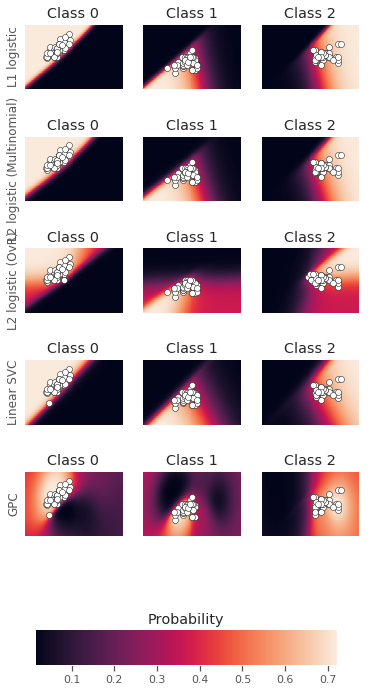

In [135]:
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause


iris = datasets.load_iris()
X = iris.data[:, 0:2]  # we only take the first two features for visualization
y = iris.target

n_features = X.shape[1]

C = 10
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

# Create different classifiers.
classifiers = {
    'L1 logistic': LogisticRegression(C=C, penalty='l1',
                                      solver='saga',
                                      multi_class='multinomial',
                                      max_iter=10000),
    'L2 logistic (Multinomial)': LogisticRegression(C=C, penalty='l2',
                                                    solver='saga',
                                                    multi_class='multinomial',
                                                    max_iter=10000),
    'L2 logistic (OvR)': LogisticRegression(C=C, penalty='l2',
                                            solver='saga',
                                            multi_class='ovr',
                                            max_iter=10000),
    'Linear SVC': SVC(kernel='linear', C=C, probability=True,
                      random_state=0),
    'GPC': GaussianProcessClassifier(kernel)
}

n_classifiers = len(classifiers)

plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)

    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))

    # View probabilities:
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
                                   extent=(3, 9, 1, 5), origin='lower')
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='w', edgecolor='k')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()

<a id="47"></a> <br>
# 3- conclusion
After the first version of this kernel, in the second edition, we introduced Sklearn. in addition,  we examined each one in detail. this kernel it is not completed yet! Following up!

>###### you may  be interested have a look at it: [**10-steps-to-become-a-data-scientist**](https://github.com/mjbahmani/10-steps-to-become-a-data-scientist)


---------------------------------------------------------------------
you can Fork and Run this kernel on Github:
> ###### [ GitHub](https://github.com/mjbahmani/10-steps-to-become-a-data-scientist)

-------------------------------------------------------------------------------------------------------------

 **I hope you find this kernel helpful and some <font color="red"><b>UPVOTES</b></font> would be very much appreciated**
 
 -----------

<a id="48"></a> <br>
# 4- References
1. [Coursera](https://www.coursera.org/specializations/data-science-python)
1. [GitHub](https://github.com/mjbahmani)
1. [Sklearn](https://scikit-learn.org)
1. [Feature Scaling with scikit-learn](http://benalexkeen.com/feature-scaling-with-scikit-learn/)
###### [Go to top](#top)

#### This Kernel is not completed and will be updated soon!!!